In [225]:
%%capture
%run 'main.py'

# 1. The Project and Dataset

## Description 
<p>Analysis of data related to metrics of the Ericson Technical Debt Project. The archival data was collected from 33 product customization tasks (PCs) of this studied project between 2013 and 2016.
</p>

## Data
<ul>
    <li>Metrics Table</li>
    <li>India Table Site</li>
    <li>Sweden Table Site</li>
    <li>Italy Table Site</li>
    <li>USA Table Site</li>
</ul>

In [226]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()

### Importing libs

In [227]:
# importando o pyplot
from matplotlib import pyplot
# importando o stats 
from scipy import stats

In [228]:
# 1. Tabela de Métricas
df_all_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 12 columns):
uniqueID              32 non-null object
ID                    32 non-null object
location              32 non-null object
maturity              32 non-null float64
totalDevelopers       32 non-null float64
complexityPoints      32 non-null float64
start                 32 non-null object
end                   32 non-null object
leadTime              32 non-null float64
technicalDebt         32 non-null float64
taskScaling           32 non-null float64
taskGlobalDistance    32 non-null float64
dtypes: float64(7), object(5)
memory usage: 4.5+ KB


## 1.1 Data sample

In [229]:
df_all_metrics.head(3)

,uniqueID,ID,location,maturity,totalDevelopers,complexityPoints,start,end,leadTime,technicalDebt,taskScaling,taskGlobalDistance
0,PC:14187,TURK-372,India,4.0,13.0,60.0,2014-08-11 00:00:00,2015-02-06 00:00:00,179.0,796.0,0.216667,1.250000
1,PC:15448,BHA-328,Virtual,4.0,25.0,170.0,2015-01-19 00:00:00,2015-06-05 00:00:00,137.0,2474.0,0.147059,6.244748
2,PC:13350,TELSTRA-038,India,4.0,7.0,35.0,2015-02-09 00:00:00,2015-04-02 00:00:00,52.0,202.0,0.200000,3.463991


In [419]:
df_all_metrics.technicalDebt

0      796.0
1     2474.0
2      202.0
3        0.0
4      626.0
5       52.0
6      517.0
7     3085.0
8     3270.0
9       20.0
10    3834.0
11    1778.0
12    5429.0
13     666.0
14    3329.0
15       4.2
16      34.0
17      37.0
18     740.0
19    1656.0
20      33.0
21     876.0
22     260.0
23     133.0
24    1115.0
25      18.0
26     504.0
27    1643.0
28     893.0
29     518.0
30    4455.0
31     943.0
Name: technicalDebt, dtype: float64

In [230]:
location = df_all_metrics.location.unique()
print("Countries evaluated in the case study: ")
for each in location:
    print(each)

Countries evaluated in the case study: 
India
Virtual
Italy
USA
Sweden


In [231]:
with open('latex/mytable1.tex','w') as tf:
    tf.write(df_all_metrics.to_latex(index=False))

## 1.2 Summary Statistics from Metrics Table

In [232]:
df_all_metrics.describe().round(2)

,maturity,totalDevelopers,complexityPoints,leadTime,technicalDebt,taskScaling,taskGlobalDistance
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,3.00,6.31,78.28,77.03,1248.13,0.15,3.34
std,1.68,4.24,115.16,36.89,1468.19,0.11,1.46
min,0.00,2.00,10.00,18.00,0.00,0.01,0.00
25%,2.00,4.00,23.75,50.75,112.75,0.08,3.46
50%,4.00,6.00,42.50,67.00,703.00,0.12,3.46
75%,4.00,7.25,96.25,102.00,1686.50,0.20,3.46
max,4.00,25.00,600.00,179.00,5429.00,0.47,6.24


### Correlation Matrix

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> The <b>correlation coefficient </b> is a measure of linear association between two variables and is between <b>-1</b> and <b>+1</b> where <b>-1</b> indicates perfect negative association and <b>+1</b> indicates perfect positive association.

In [233]:
df_all_metrics.corr().round(4)

,maturity,totalDevelopers,complexityPoints,leadTime,technicalDebt,taskScaling,taskGlobalDistance
maturity,1.0000,0.3162,-0.2918,0.0119,-0.0476,0.5259,0.2134
totalDevelopers,0.3162,1.0000,0.2966,0.5913,0.3433,0.0765,0.2219
complexityPoints,-0.2918,0.2966,1.0000,0.3300,0.6088,-0.4695,-0.2742
leadTime,0.0119,0.5913,0.3300,1.0000,0.4088,-0.2425,-0.1703
technicalDebt,-0.0476,0.3433,0.6088,0.4088,1.0000,-0.4190,-0.0258
taskScaling,0.5259,0.0765,-0.4695,-0.2425,-0.4190,1.0000,0.2017
taskGlobalDistance,0.2134,0.2219,-0.2742,-0.1703,-0.0258,0.2017,1.0000


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
The most common correlation coefficient is the Pearson correlation, that uses p or r, measuring the degree of correlation, which is 
sensitive only to a linear relationship between two variables, however, it was chosen Spearmans rank correlation that have been developed 
to be more robust than Pearsons, that is, more sensitive to nonlinear relationships, because TD does not follow a Normal Distribution.    
   </p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    Through the correlation matrix, considering the variable <b> technicalDebt </b>, it can be seen that the features <b> totalDevelopers </b>, <b> complexityPoints </b>, <b> leadTime </b> and <b> taskScaling </b> can have a good level of correlation
</p>

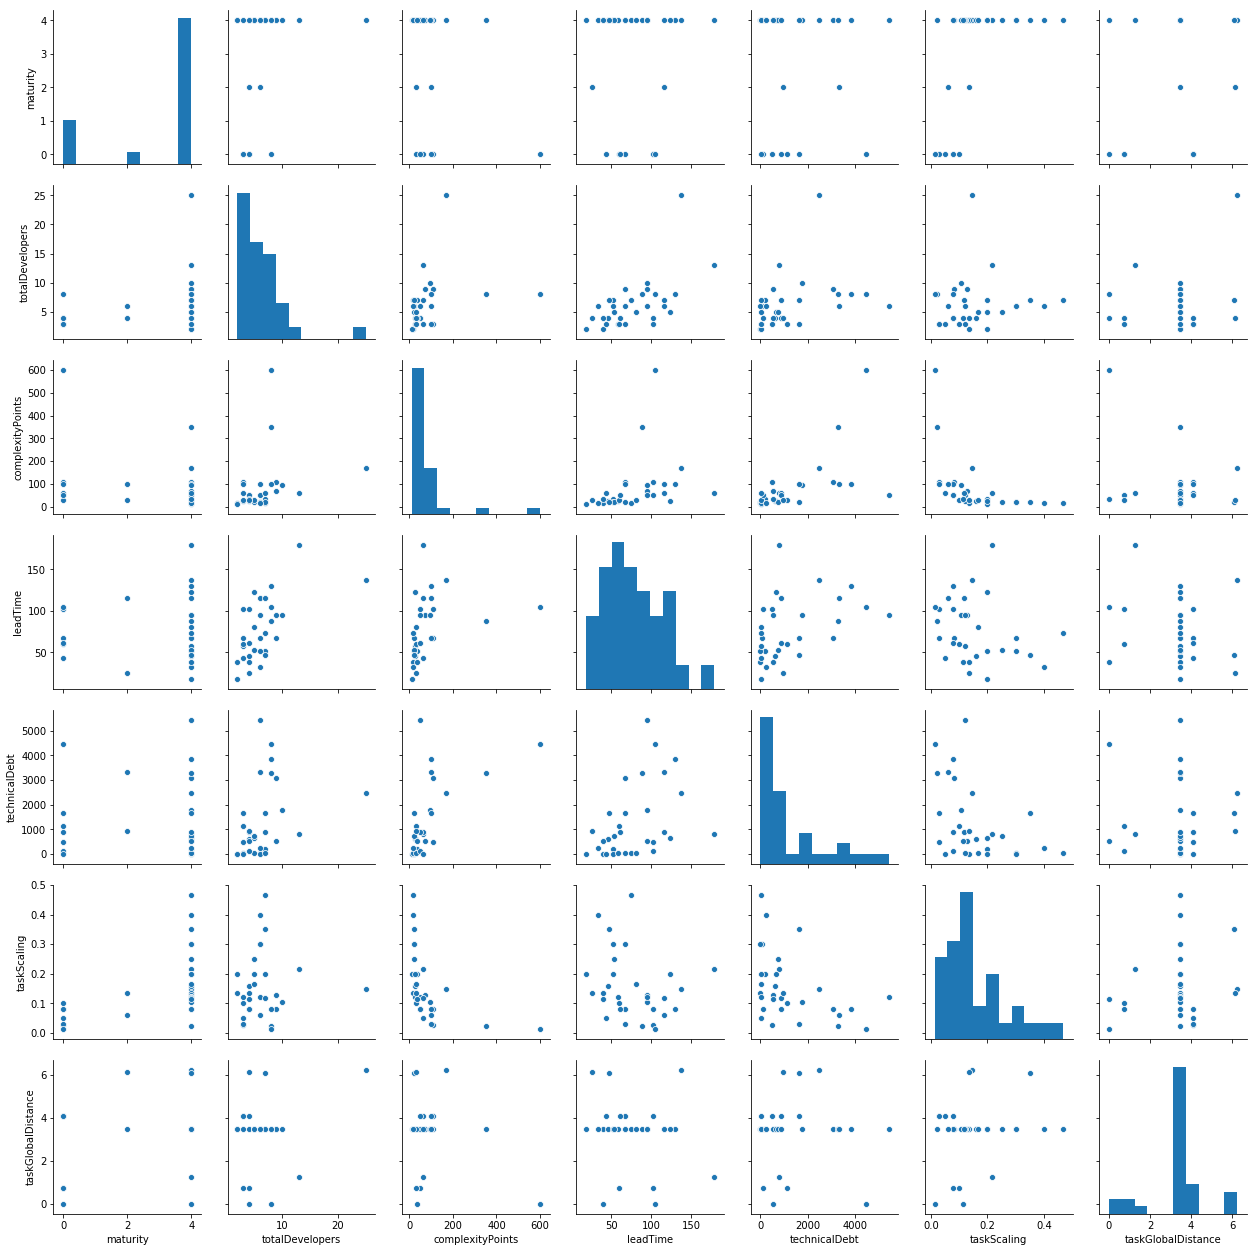

In [234]:
sns.pairplot(df_all_metrics)
plt.show()

## Ploting the pairplot of Technical Debt and another features

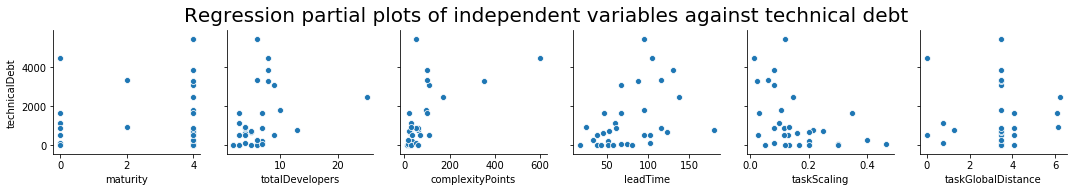

In [235]:
ax = sns.pairplot(df_all_metrics, y_vars='technicalDebt', x_vars=['maturity', 'totalDevelopers', 'complexityPoints', 
                                                                  'leadTime', 'taskScaling', 'taskGlobalDistance'])
ax.fig.suptitle('Regression partial plots of independent variables against technical debt', fontsize=20, y=1.05)
ax

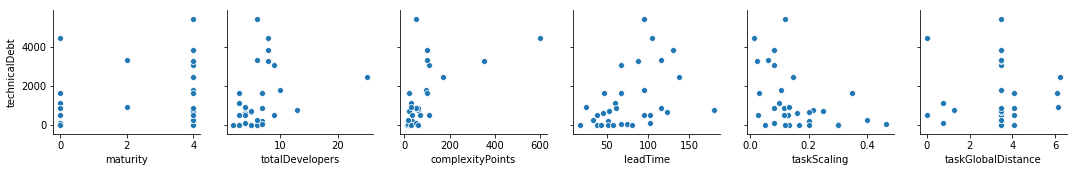

In [236]:
ax = sns.pairplot(df_all_metrics, y_vars='technicalDebt', x_vars=['maturity', 'totalDevelopers', 'complexityPoints', 
                                                                  'leadTime', 'taskScaling', 'taskGlobalDistance'])
ax.fig.suptitle('', fontsize=20, y=1.05)
ax

### Ploting the *dependent* variable (y)
(Technical Debt points over the evolution (in months) of the software)

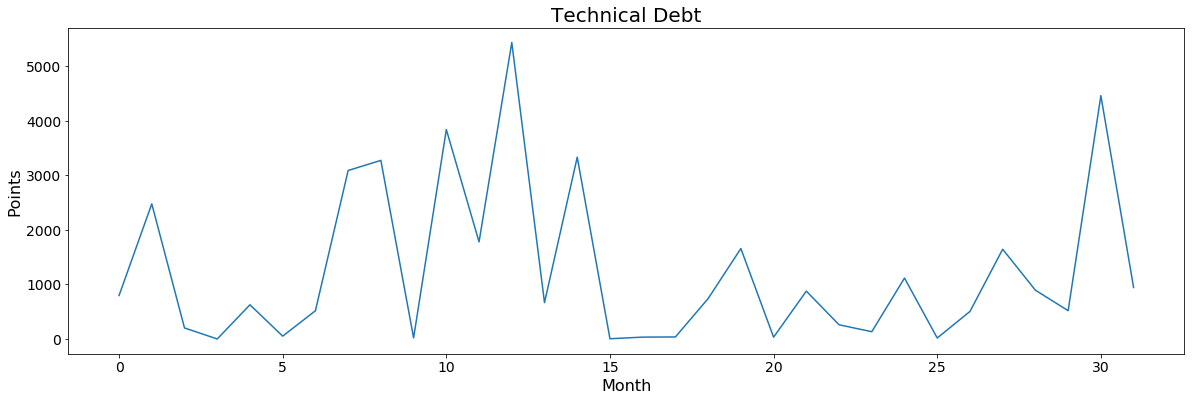

In [237]:
fig, ax = pyplot.subplots(figsize=(20,6))

ax.set_title('Technical Debt', fontsize=20)
ax.set_ylabel('Points', fontsize=16)
ax.set_xlabel('Month', fontsize=16)
ax = df_all_metrics['technicalDebt'].plot(fontsize=14)

In [238]:
def show_box_plot(feature):
  sns.boxplot(data=df_all_metrics[feature], orient='h')

def my_describe(feature):
  my_data = df_all_metrics[feature]
  print("Estatísticas dos dados de " + feature)
  print(my_data.describe().round(2))

def my_outliers(feature, limite):
  my_data = df_all_metrics[feature]
  print("Outliers dos dados de " + feature)
  print(my_data[my_data > limite])

In [239]:
def show_distribution(feature):
  ax = sns.distplot(df_all_metrics[feature])
  ax.figure.set_size_inches(12, 6)
  ax.set_title('Frequency Distribution', fontsize=20)
  ax.set_ylabel(feature, fontsize=16)
  ax

### Box plot of *dependent* variable (y)

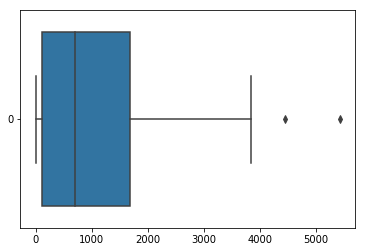

In [240]:
show_box_plot('technicalDebt')

In [241]:
my_describe('technicalDebt')

Estatísticas dos dados de technicalDebt
count      32.00
mean     1248.13
std      1468.19
min         0.00
25%       112.75
50%       703.00
75%      1686.50
max      5429.00
Name: technicalDebt, dtype: float64


In [242]:
my_outliers('technicalDebt', 4000)

Outliers dos dados de technicalDebt
12    5429.0
30    4455.0
Name: technicalDebt, dtype: float64


### Box plot of feature1 (x1)

In [243]:
feature1 = 'leadTime'

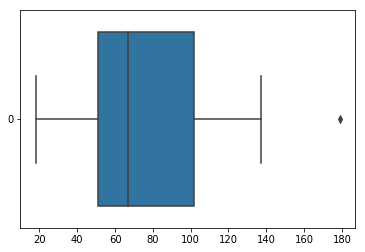

In [244]:
show_box_plot(feature1)

In [245]:
my_describe(feature1)

Estatísticas dos dados de leadTime
count     32.00
mean      77.03
std       36.89
min       18.00
25%       50.75
50%       67.00
75%      102.00
max      179.00
Name: leadTime, dtype: float64


In [246]:
my_outliers(feature1, 160)

Outliers dos dados de leadTime
0    179.0
Name: leadTime, dtype: float64


### Box plot of feature 2 (x2)

In [247]:
feature2 = 'complexityPoints'

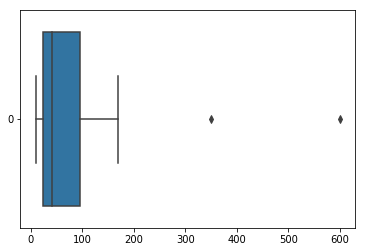

In [248]:
show_box_plot(feature2)

In [249]:
my_describe(feature2)

Estatísticas dos dados de complexityPoints
count     32.00
mean      78.28
std      115.16
min       10.00
25%       23.75
50%       42.50
75%       96.25
max      600.00
Name: complexityPoints, dtype: float64


In [250]:
my_outliers(feature2, 300)

Outliers dos dados de complexityPoints
8     350.0
30    600.0
Name: complexityPoints, dtype: float64


### Box plot of feature 3 (x3)

In [251]:
feature3 = 'maturity'

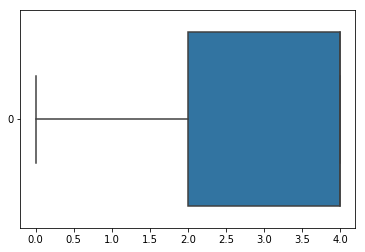

In [252]:
show_box_plot(feature3)

In [253]:
my_describe(feature3)

Estatísticas dos dados de maturity
count    32.00
mean      3.00
std       1.68
min       0.00
25%       2.00
50%       4.00
75%       4.00
max       4.00
Name: maturity, dtype: float64


### Box plot of feature 4 (x4)

In [254]:
feature4 = 'taskGlobalDistance'

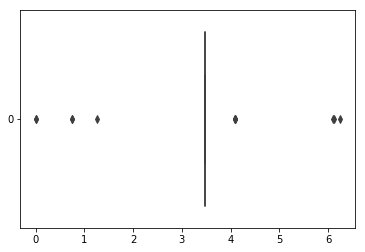

In [255]:
show_box_plot(feature4)

In [256]:
my_describe(feature4)

Estatísticas dos dados de taskGlobalDistance
count    32.00
mean      3.34
std       1.46
min       0.00
25%       3.46
50%       3.46
75%       3.46
max       6.24
Name: taskGlobalDistance, dtype: float64


### Box plot of feature 5 (x5)

In [257]:
feature5 = 'taskScaling'

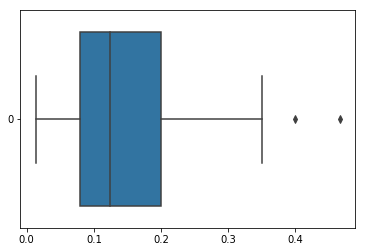

In [258]:
show_box_plot(feature5)

In [259]:
my_describe(feature5)

Estatísticas dos dados de taskScaling
count    32.00
mean      0.15
std       0.11
min       0.01
25%       0.08
50%       0.12
75%       0.20
max       0.47
Name: taskScaling, dtype: float64


### Box plot of feature 6 (x6)

In [260]:
feature6 = 'totalDevelopers'

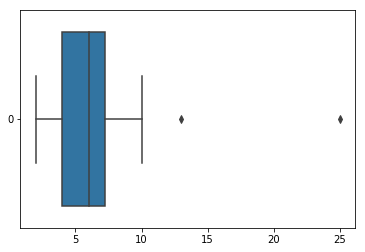

In [261]:
show_box_plot(feature6)

In [262]:
my_describe(feature6)

Estatísticas dos dados de totalDevelopers
count    32.00
mean      6.31
std       4.24
min       2.00
25%       4.00
50%       6.00
75%       7.25
max      25.00
Name: totalDevelopers, dtype: float64


In [263]:
my_outliers(feature6, 10)

Outliers dos dados de totalDevelopers
0    13.0
1    25.0
Name: totalDevelopers, dtype: float64


### Frequency Distributions of the *Dependent* Variables

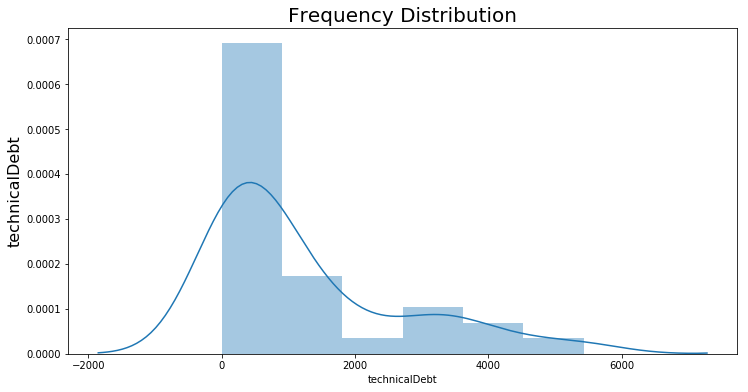

In [264]:
show_distribution('technicalDebt')

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
By the Frequency Distribution of the Technical Debt, it can be seen that it does not follow a normal distribution
</p>

### Frequency Distribution of the feature *LeadTime* (x1)

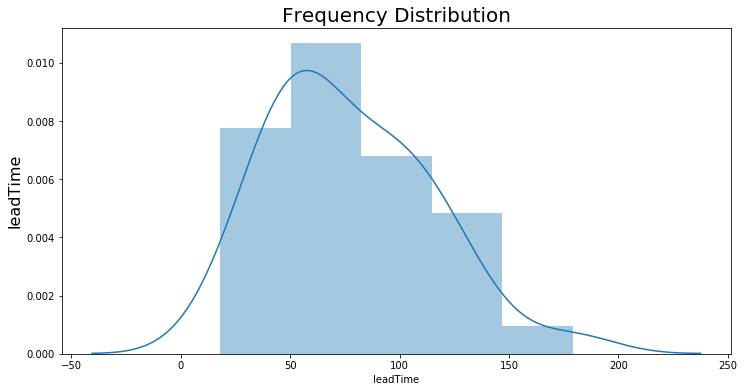

In [265]:
show_distribution('leadTime')

### Frequency Distribution of the feature *ComplexityPoints* (x2)

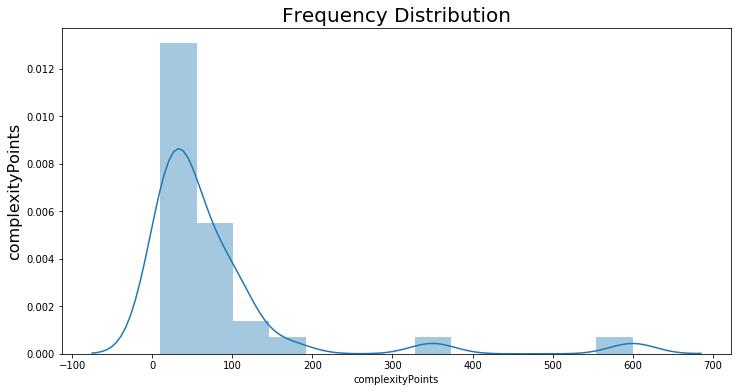

In [266]:
show_distribution('complexityPoints')

### Frequency Distribution of the feature *Maturity* (x3)

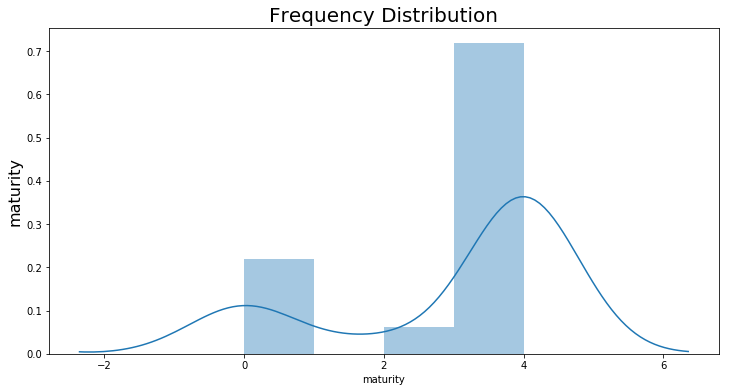

In [267]:
show_distribution('maturity')

### Frequency Distribution of the feature *TaskGlobalDistance* (x4)

In [268]:
###?

### Frequency Distribution of the feature *TotalDevelopers* (x5)

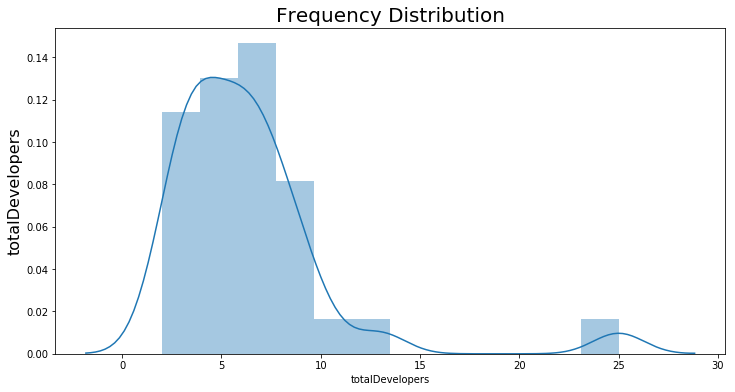

In [269]:
show_distribution('totalDevelopers')

### Boxplot Technical Debt x Location

Text(0.5,1,'Boxplot Distribuition Technical Debt x Location')

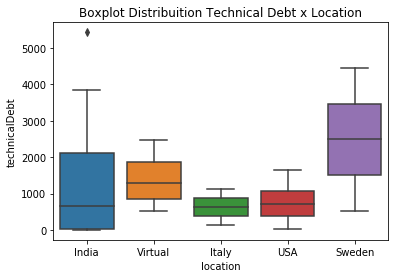

In [270]:
sns.boxplot(x='location', y='technicalDebt', data=df_all_metrics).set_title('Boxplot Distribuition Technical Debt x Location')

## 1.3 Analyzing the correlations between features (xi) and the dependent variable (y)

### 1.3.1 Correlation graph between LeadTime (x1) and Technical Debt (y)

In [271]:
arrayLeadTime = df_all_metrics.leadTime.values
arrayTechnicalDebt = df_all_metrics.technicalDebt.values

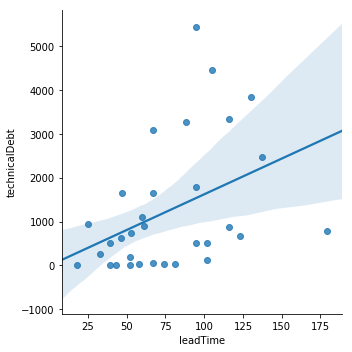

In [272]:
sns.lmplot(x='leadTime', y='technicalDebt', data=df_all_metrics)

In [273]:
def checkSpearmansCorrelations(coef,p, alfa):
    print('Spearmans correlation coefficient: %.3f' % coef)
    # interpret the significance
    if p > alfa:
	    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
	    print('Samples are correlated (reject H0) p=%.3f' % p)

### 1.3.1.1 Calculate spearman's correlation (LeadTime x TD)

In [274]:
stats.spearmanr(arrayLeadTime, arrayTechnicalDebt)

SpearmanrResult(correlation=0.48587185407612227, pvalue=0.004814195878751078)

In [275]:
type(stats.spearmanr(arrayLeadTime, arrayTechnicalDebt))

scipy.stats.stats.SpearmanrResult

In [276]:
# calculate spearman's correlation
coefLeadTime, pLeadTime = stats.spearmanr(arrayLeadTime, arrayTechnicalDebt)

In [277]:
alfa = 0.05

In [278]:
checkSpearmansCorrelations(coefLeadTime, pLeadTime, alfa)

Spearmans correlation coefficient: 0.486
Samples are correlated (reject H0) p=0.005


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    By analyzing Spearman's coefficient, it can be seen that <u> LeadTime </u> and <u> TD </u> <b> are </b> <u> correlated </u>. As a result, there is a tendency that as LeadTime increases the Technical Debt it tends to increase
</p>

### 1.3.2 Correlation Graph between ComplexityPoint (x2) and Technical Debt (y)

In [279]:
arrayComplexityPoints = df_all_metrics.complexityPoints.values

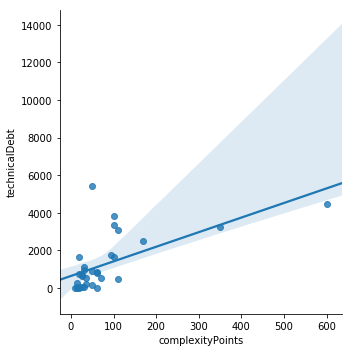

In [280]:
sns.lmplot(x='complexityPoints', y='technicalDebt', data=df_all_metrics)

### 1.3.2.1 Calculate spearman's correlation (ComplexityPoints x TD)

In [281]:
# calculate spearman's correlation
coefComplexityPoints, pComplexityPoints = stats.spearmanr(arrayComplexityPoints, arrayTechnicalDebt)
alfa = 0.05
checkSpearmansCorrelations(coefComplexityPoints, pComplexityPoints, alfa)

Spearmans correlation coefficient: 0.650
Samples are correlated (reject H0) p=0.000


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
        By analyzing the Spearman coefficient, it can be seen that <u> ComplexityPoints </u> and <u> TD </u> <b> are </b> <u> correlated </u>. As a result, there is a trend that as ComplexityPoints increases the Technical Debt tends to increase.
</p>

### 1.3.3 Correlation Graph between Maturity (x3) and Technical Debt (y)

In [282]:
arrayMaturity = df_all_metrics.maturity.values

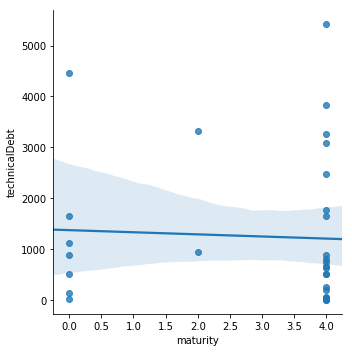

In [283]:
sns.lmplot(x='maturity', y='technicalDebt', data=df_all_metrics)

### 1.3.3.1 Calculate spearman's correlation (Maturity x TD)

In [284]:
# calculate spearman's correlation
coefMaturity, pMaturity = stats.spearmanr(arrayMaturity, arrayTechnicalDebt)
alfa = 0.05
checkSpearmansCorrelations(coefMaturity, pMaturity, alfa)

Spearmans correlation coefficient: -0.135
Samples are uncorrelated (fail to reject H0) p=0.462


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
        By analyzing Spearman's coefficient, it can be seen that <u> Maturity </u> and <u> TD </u> <b> are NOT </b> <u> correlated </u>.
</p>

### 1.3.4 Correlation Chart between TaskGlobalDistance (x4) and Technical Debt (y)

In [285]:
arrayTaskGlobalDistance = df_all_metrics.taskGlobalDistance.values

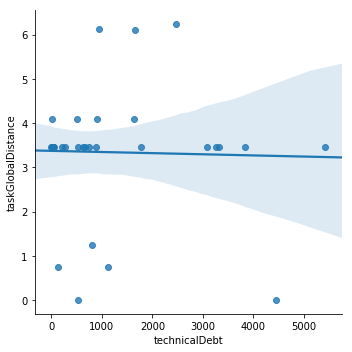

In [286]:
sns.lmplot(x='technicalDebt', y='taskGlobalDistance', data=df_all_metrics)

### 1.3.4.1 Calculate spearman's correlation (TaskGlobalDistance x TD)

In [287]:
# calculate spearman's correlation
coefTaskGlobalDistance, pTaskGlobalDistance = stats.spearmanr(arrayTaskGlobalDistance, arrayTechnicalDebt)
alfa = 0.05
checkSpearmansCorrelations(coefTaskGlobalDistance, pTaskGlobalDistance, alfa)

Spearmans correlation coefficient: 0.034
Samples are uncorrelated (fail to reject H0) p=0.855


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
        By analyzing the Spearman coefficient, it can be seen that <u> TaskGlobalDistance </u> and <u> TD </u> <b> are NOT </b> <u> correlated </u>.
</p>

### 1.3.5 Correlation Graph between totalDevelopers (x5) and Technical Debt (y)

In [288]:
arrayTotalDevelopers = df_all_metrics.totalDevelopers.values

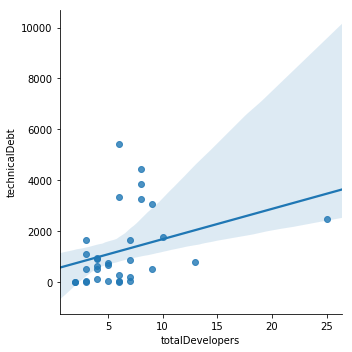

In [289]:
sns.lmplot(x='totalDevelopers', y='technicalDebt', data=df_all_metrics)

### 1.3.5.1 Calculate spearman's correlation (TotalDevelopers x TD)

In [290]:
# calculate spearman's correlation
coefTotalDevelopers, pTotalDevelopers = stats.spearmanr(arrayTotalDevelopers, arrayTechnicalDebt)
alfa = 0.05
checkSpearmansCorrelations(coefTotalDevelopers, pTotalDevelopers, alfa)

Spearmans correlation coefficient: 0.505
Samples are correlated (reject H0) p=0.003


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
        By analyzing the Spearman coefficient, it can be seen that <u> TotalDevelopers </u> and <u> TD </u> <b> are </b> <u> correlated </u>. As a result, there is a trend that as ComplexityPoints increases the Technical Debt tends to increase.
</p>

### 1.3.6 Correlation graph between taskScaling and Technical Debt

In [291]:
arrayTaskScaling = df_all_metrics.taskScaling.values

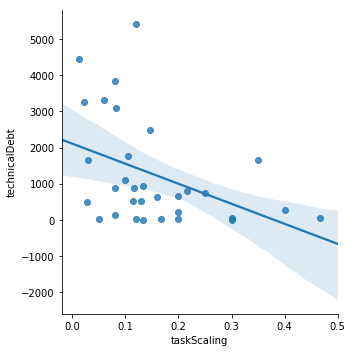

In [292]:
sns.lmplot(x='taskScaling', y='technicalDebt', data=df_all_metrics)

### 1.3.6.1 Calculate spearman's correlation (taskScaling x TD)

In [293]:
coefTaskScaling, pTaskScaling = stats.spearmanr(arrayTaskScaling, arrayTechnicalDebt)
alfa = 0.05
checkSpearmansCorrelations(coefTaskScaling, pTaskScaling, alfa)

Spearmans correlation coefficient: -0.439
Samples are correlated (reject H0) p=0.012


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
        By analyzing Spearman's coefficient, it can be seen that <u> TaskScaling </u> and <u> TD </u> <b> are </b> <u> correlated </u>.
</p>

## 1.4 Summary of correlation analysis (Spearman's correlation coefficient)

|  Caracterítica     | Dívida Técnica  | Correlacionado |  
|--------------------|-----------------|----------------|
| LeadTime           | TD              | SIM            |
| ComplexityPoints   | TD              | SIM            |
| TotalDevelopers    | TD              | SIM            |
| TaskScaling        | TD              | SIM            | 
| Maturity           | TD              | Não            | 
| TaskGlobalDistance | TD              | Não            |

In [294]:
from tabulate import tabulate

In [295]:
def showCalcPSpearman(p, alfa):
    if p > alfa:
        return 'NO'
    else:
        return 'YES'

In [296]:
LeadTimeRow = ['LeadTime', 'TD', coefLeadTime.round(3), pLeadTime.round(3), 
               showCalcPSpearman(pLeadTime, 0.05)]

ComplexityPointsRow = ['ComplexityPoints', 'TD', coefComplexityPoints.round(3), pComplexityPoints.round(3),
                       showCalcPSpearman(pComplexityPoints, 0.05)]

TotalDevelopersRow = ['TotalDevelopers', 'TD', coefTotalDevelopers.round(3), pTotalDevelopers.round(3),
                      showCalcPSpearman(pTotalDevelopers, 0.05)]

TaskScalingRow = ['TaskScaling', 'TD', coefTaskScaling.round(3), pTaskScaling.round(3), 
                  showCalcPSpearman(pTaskScaling, 0.05)]

MaturityRow = ['Maturity', 'TD', coefMaturity.round(3), pMaturity.round(3), 
               showCalcPSpearman(pMaturity, 0.05)]

TaskGlobalDistanceRow = ['TaskGlobalDistance', 'TD', coefTaskGlobalDistance.round(3), pTaskGlobalDistance.round(3),
                         showCalcPSpearman(pTaskGlobalDistance, 0.05)]

analysisHeaders = ['Característica', 'Dívida Técnica', 'Spearmans Coef', 'p', 'Correlacionado']

print(tabulate([LeadTimeRow, ComplexityPointsRow, TotalDevelopersRow, 
                TaskScalingRow, MaturityRow, TaskGlobalDistanceRow],
               headers=analysisHeaders))

Característica      Dívida Técnica      Spearmans Coef      p  Correlacionado
------------------  ----------------  ----------------  -----  ----------------
LeadTime            TD                           0.486  0.005  YES
ComplexityPoints    TD                           0.65   0      YES
TotalDevelopers     TD                           0.505  0.003  YES
TaskScaling         TD                          -0.439  0.012  YES
Maturity            TD                          -0.135  0.462  NO
TaskGlobalDistance  TD                           0.034  0.855  NO


In [297]:
import numpy as np

In [298]:
l1_LeadTimeRow = ['TD', coefLeadTime.round(3), pLeadTime.round(3), showCalcPSpearman(pLeadTime, 0.05)]

l2_ComplexityPointsRow = ['TD', coefComplexityPoints.round(3), pComplexityPoints.round(3), 
						showCalcPSpearman(pComplexityPoints, 0.05)]

l3_TotalDevelopersRow = ['TD', coefTotalDevelopers.round(3), pTotalDevelopers.round(3),
                      showCalcPSpearman(pTotalDevelopers, 0.05)]

l4_TaskScalingRow = ['TD', coefTaskScaling.round(3), pTaskScaling.round(3), 
                  showCalcPSpearman(pTaskScaling, 0.05)]

l5_MaturityRow = ['TD', coefMaturity.round(3), pMaturity.round(3), 
               showCalcPSpearman(pMaturity, 0.05)]

l6_TaskGlobalDistanceRow = ['TD', coefTaskGlobalDistance.round(3), pTaskGlobalDistance.round(3),
                         showCalcPSpearman(pTaskGlobalDistance, 0.05)]

c_analysisHeaders = ['Correlation', 'Spearmans Coef', 'p', 'Corelated']


my_array_spm = np.array([
	l1_LeadTimeRow, 
	l2_ComplexityPointsRow, 
	l3_TotalDevelopersRow, 
	l4_TaskScalingRow, 
	l5_MaturityRow, 
	l6_TaskGlobalDistanceRow
	])

my_index_dw_spm = ['leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling', 'Maturity', 'TaskGlobalDistance']
my_columns_dw_spm = c_analysisHeaders
df_my_dw_spm = pd.DataFrame(data=my_array_spm, index=my_index_dw_spm, columns=my_columns_dw_spm)
df_my_dw_spm

,Correlation,Spearmans Coef,p,Corelated
leadTime,TD,0.486,0.005,YES
complexityPoints,TD,0.65,0.0,YES
totalDevelopers,TD,0.505,0.003,YES
taskScaling,TD,-0.439,0.012,YES
Maturity,TD,-0.135,0.462,NO
TaskGlobalDistance,TD,0.034,0.855,NO


In [299]:
with open('latex/mytable5.tex','w') as tf:
    tf.write(df_my_dw_spm.to_latex())

# <font color='red' style='font-size: 30px;'>Estimating a Linear Regression Model for Technical Debt </font>
<hr style='border: 2px solid red;'>

# Linear Regression
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>The regression analysis concerns the study of the dependence of a variable (the <b> dependent </b> variable) in relation to one or more variables, the explanatory variables, in order to estimate and / or predict the average value of the first in terms of the known or fixed values of the second.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>The *scikit-learn* is a model of Python to solve problems about *machine learning*.</p>

## Importing the *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [300]:
from sklearn.model_selection import train_test_split

## Creating a Series (pandas) to store the Technical Debt (TD ) (y)

In [301]:
df_all_metrics.head(3)

,uniqueID,ID,location,maturity,totalDevelopers,complexityPoints,start,end,leadTime,technicalDebt,taskScaling,taskGlobalDistance
0,PC:14187,TURK-372,India,4.0,13.0,60.0,2014-08-11 00:00:00,2015-02-06 00:00:00,179.0,796.0,0.216667,1.250000
1,PC:15448,BHA-328,Virtual,4.0,25.0,170.0,2015-01-19 00:00:00,2015-06-05 00:00:00,137.0,2474.0,0.147059,6.244748
2,PC:13350,TELSTRA-038,India,4.0,7.0,35.0,2015-02-09 00:00:00,2015-04-02 00:00:00,52.0,202.0,0.200000,3.463991


In [302]:
y = df_all_metrics.technicalDebt

In [303]:
y.describe().round(2)

count      32.00
mean     1248.13
std      1468.19
min         0.00
25%       112.75
50%       703.00
75%      1686.50
max      5429.00
Name: technicalDebt, dtype: float64

In [304]:
my_dict = {0:'technicalDebt', 1:'leadTime', 2:'complexityPoints', 
           3:'totalDevelopers',4:'taskScaling', 5:'maturity', 6:'taskGlobalDistance'}
my_dict

{0: 'technicalDebt',
 1: 'leadTime',
 2: 'complexityPoints',
 3: 'totalDevelopers',
 4: 'taskScaling',
 5: 'maturity',
 6: 'taskGlobalDistance'}

## Creating a DataFrame (pandas) to store the independent variables (X1, X2, X3, X4)

In [305]:
X = df_all_metrics[[my_dict[1], my_dict[2], my_dict[3], my_dict[4]]]

In [306]:
X.head(5)

,leadTime,complexityPoints,totalDevelopers,taskScaling
0,179.0,60.0,13.0,0.216667
1,137.0,170.0,25.0,0.147059
2,52.0,35.0,7.0,0.200000
3,39.0,15.0,2.0,0.133333
4,46.0,25.0,4.0,0.160000


In [307]:
X.describe().round(3)

,leadTime,complexityPoints,totalDevelopers,taskScaling
count,32.000,32.000,32.000,32.000
mean,77.031,78.281,6.312,0.155
std,36.887,115.162,4.238,0.111
min,18.000,10.000,2.000,0.013
25%,50.750,23.750,4.000,0.080
50%,67.000,42.500,6.000,0.124
75%,102.000,96.250,7.250,0.200
max,179.000,600.000,25.000,0.467


## Creating the dataset of train and test

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [309]:
X_train.shape

(22, 4)

In [310]:
X_test.shape

(10, 4)

In [311]:
y_train.shape

(22,)

In [312]:
y_test.shape

(10,)

## Linear Regression Fuction with 4 variables
Y = B0 + B1x1 + B2x2 + B3x3 + B4x4

## Importing *LinearRegression* and *metrics* from *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [313]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instance of class *LinearRegression()*

In [314]:
modelo = LinearRegression()

## Using the * fit () * method of the "model" object to estimate our linear model using the TRAINING data (y_train and X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [315]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Obtaining the determination coefficient (R²) of the estimated model with the TRAINING data

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Determination Coefficient - R²

The coefficient of determination (R²) is a summary measure that tells how much the regression line fits the data. It is a value between 0 and 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [316]:
print('R^2 : {}'.format(modelo.score(X_train, y_train).round(2)))

R^2 : 0.65


## Generating forecasts for TEST data (X_test) using the * predict () * method of the "model" object
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [317]:
y_previsto = modelo.predict(X_test)

In [318]:
y_previsto.shape

(10,)

## Get the coefficient of determination (R²) for the predictions of our model

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [319]:
print('Rˆ2 = ', metrics.r2_score(y_test, y_previsto).round(2))

Rˆ2 =  0.06


# <font color='red' style='font-size: 30px;'>Getting Punctual Forecasts</font>
<hr style='border: 2px solid red;'>

In [320]:
import numpy as np

In [321]:
X_test.head(3)

,leadTime,complexityPoints,totalDevelopers,taskScaling
6,95.0,70.0,9.0,0.128571
26,102.0,110.0,3.0,0.027273
25,43.0,60.0,3.0,0.050000


In [322]:
X_test.describe().round(3)

,leadTime,complexityPoints,totalDevelopers,taskScaling
count,10.000,10.000,10.000,10.000
mean,70.900,50.500,5.300,0.140
std,25.736,32.952,2.584,0.083
min,39.000,15.000,2.000,0.027
25%,45.500,22.500,3.250,0.108
50%,74.000,42.500,5.000,0.124
75%,95.000,67.500,6.000,0.158
max,102.000,110.000,10.000,0.300


## Input data

In [323]:
entrada = X_test[0:1]
entrada

,leadTime,complexityPoints,totalDevelopers,taskScaling
6,95.0,70.0,9.0,0.128571


## Generating point forecast

In [324]:
modelo.predict(entrada)[0].round(3)

1523.998

## Creating a simple simulator

In [325]:
x1 = 95
x2 = 70
x3 = 9
x4 = 0.128
minha_entrada = [[x1, x2, x3, x4]]
minha_entrada

[[95, 70, 9, 0.128]]

In [326]:
minha_entrada

[[95, 70, 9, 0.128]]

In [327]:
print('Com a x1={}, x2={}, x3={}, x4={} a previsão de Dívida Técnica (TD) será de {} pontos'.format
      (x1, x2, x3, x4, modelo.predict(minha_entrada)[0].round(2)))

Com a x1=95, x2=70, x3=9, x4=0.128 a previsão de Dívida Técnica (TD) será de 1525.88 pontos


# <font color='red' style='font-size: 30px;'>Interpretation of Estimated Coefficients</font>
<hr style='border: 2px solid red;'>

## Getting the model intercept

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>The <b> intercept </b> represents the average effect in $ Y $ (Technical Debt) with all explanatory variables excluded from the model. More simply, the <b> intercept </b> represents the average effect in $ Y $ (Technical Debt) when $ X_1 $ (leadTime), $ X_2 $ (complexityPoints), $ X_3 $ (totalDevelopers), $ X_4 $ (taskScaling) is equal to zero.
In other words, it gives us the "direct" or "net" effect of a unit of variation in $ X_1 $ on the average value of $ Y $, excluding the effects that $ X_2 $, $ X_3 $ and $ X_4 $ can have about the average of $ Y $. Similarly, we can interpret the other regression coefficients. </p>

## Confirming the order of the explanatory variables in the DataFrame

In [328]:
X.columns

Index(['leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling'], dtype='object')

In [329]:
modelo.intercept_

894.6683937656759

In [330]:
modelo.coef_

array([ 1.93489284e+00,  5.48273811e+00,  5.39817369e+01, -3.29865356e+03])

In [331]:
my_coeficientes = ['intercepto', 'leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling']

## Creating a list of model variable names

In [332]:
print("B0={} B1={}  B2={} B3={} B4={}".format(
    modelo.intercept_.round(3), modelo.coef_[0].round(3), 
    modelo.coef_[1].round(3), modelo.coef_[2].round(3), 
    modelo.coef_[3].round(3)))

B0=894.668 B1=1.935  B2=5.483 B3=53.982 B4=-3298.654


## Creating a dictionary with the coefficients of the model variables

In [333]:
dict_coeficientes = {my_coeficientes[0]:modelo.intercept_.round(3), my_coeficientes[1]:modelo.coef_[0].round(3), 
                     my_coeficientes[2]:modelo.coef_[1].round(3), my_coeficientes[3]:modelo.coef_[2].round(3),
                     my_coeficientes[4]:modelo.coef_[3].round(3)}
dict_coeficientes

{'intercepto': 894.668,
 'leadTime': 1.935,
 'complexityPoints': 5.483,
 'totalDevelopers': 53.982,
 'taskScaling': -3298.654}

## Creating a DataFrame to store model coefficients

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [334]:
df_my_coeficientes = pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=my_coeficientes, columns=['valor'])
df_my_coeficientes.round(2)

,valor
intercepto,894.67
leadTime,1.93
complexityPoints,5.48
totalDevelopers,53.98
taskScaling,-3298.65


In [335]:
df_my_coeficientes.round(2).valor

intercepto           894.67
leadTime               1.93
complexityPoints       5.48
totalDevelopers       53.98
taskScaling        -3298.65
Name: valor, dtype: float64

In [336]:
with open('latex/mytable6.tex','w') as tf:
    tf.write(df_my_coeficientes.to_latex())

## Interpretation of Estimated Coefficients

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '>
<b> Intercept </b> → Excluding the effect of the explanatory variables ($ X_1 = X_2 = X_3 = X_4 = 0 $) the average effect on the Technical Debt would be <b> 894.67 points </b>.
</p>

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '>
<b> leadTime </b> → Keeping the values ​​of $ X_2 $ (complexityPoints), $ X_3 $ (totalDevelopers) and $ X_4 $ (taskScaling) constant, the increase of 1 point in Technical Debt (TD) generates a average change in lead time of <b> 1.93 </b>.
</p>

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '>
<b> complexityPoints </b> → Keeping the values ​​of $ X_1 $ (leadTime), $ X_3 $ (totalDevelopers) and $ X_4 $ (taskScaling) constant, the increase of 1 point in Technical Debt (TD) generates a average variation in complexityPoints of <b> 5.48 </b>.
</p>

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '>
<b> totalDevelopers </b> → Keeping the values ​​of $ X_1 $ (leadTime), $ X_2 $ (complexityPoints) and $ X_4 $ (taskScaling) constant, the increase of 1 point in Technical Debt (TD) generates a average change in total Developers of <b> 53.98 </b>.
</p>

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '>
<b> taskScaling </b> → Keeping the values ​​of $ X_1 $ (leadTime), $ X_2 $ (complexityPoints) and $ X_3 $ (totalDevelopers) constant, the increase of 1 point in the Technical Debt (TD) generates a average variation in the taskScaling of <b> -3298.65 </b>.
</p>

In [337]:
print("Y = {} + {}({}) + {}({}) + {}({}) + {}({})".format(modelo.intercept_.round(3), 
     dict_coeficientes[my_coeficientes[1]].round(3), my_coeficientes[1], 
     dict_coeficientes[my_coeficientes[2]].round(3), my_coeficientes[2], 
     dict_coeficientes[my_coeficientes[3]].round(3), my_coeficientes[3], 
     dict_coeficientes[my_coeficientes[4]].round(3), my_coeficientes[4]))

Y = 894.668 + 1.935(leadTime) + 5.483(complexityPoints) + 53.982(totalDevelopers) + -3298.654(taskScaling)


# <font color='red' style='font-size: 30px;'>Graphical Analysis of Model Predictions </font>
<hr style='border: 2px solid red;'>

## Generating model predictions for TRAINING data

In [338]:
y_previsto_train = modelo.predict(X_train)

## Scatter plot between estimated and actual value

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

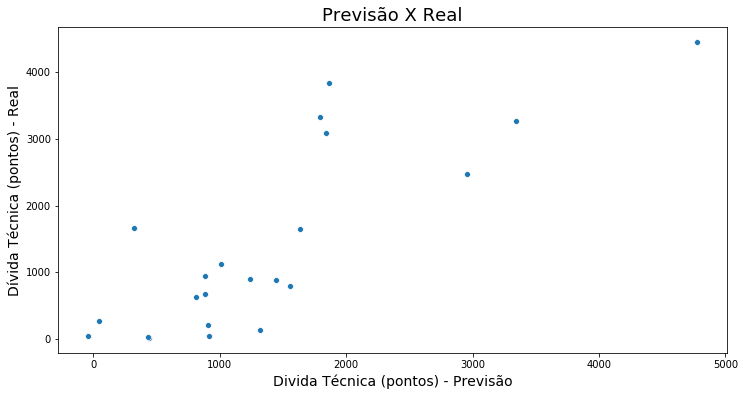

In [339]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Divida Técnica (pontos) - Previsão', fontsize=14)
ax.set_ylabel('Dívida Técnica (pontos) - Real', fontsize=14)
ax

## Getting the waste

In [340]:
residuo = y_train - y_previsto_train

In [341]:
residuo

31      59.370669
14    1535.639018
30    -320.346858
17      78.407967
2     -703.320102
16    -876.067415
21    -565.109493
22     214.810073
10    1971.560116
15    -435.031937
24     107.676038
4     -182.884295
9     -412.556608
8      -70.353403
13    -213.906638
28    -345.868425
1     -482.261503
27       7.434371
0     -761.032807
7     1241.646798
23   -1185.199032
19    1337.393468
Name: technicalDebt, dtype: float64

## Scatter plot between estimated value and waste

Informal method of verifying the hypothesis of constant variance of residues (homoscedasticity)

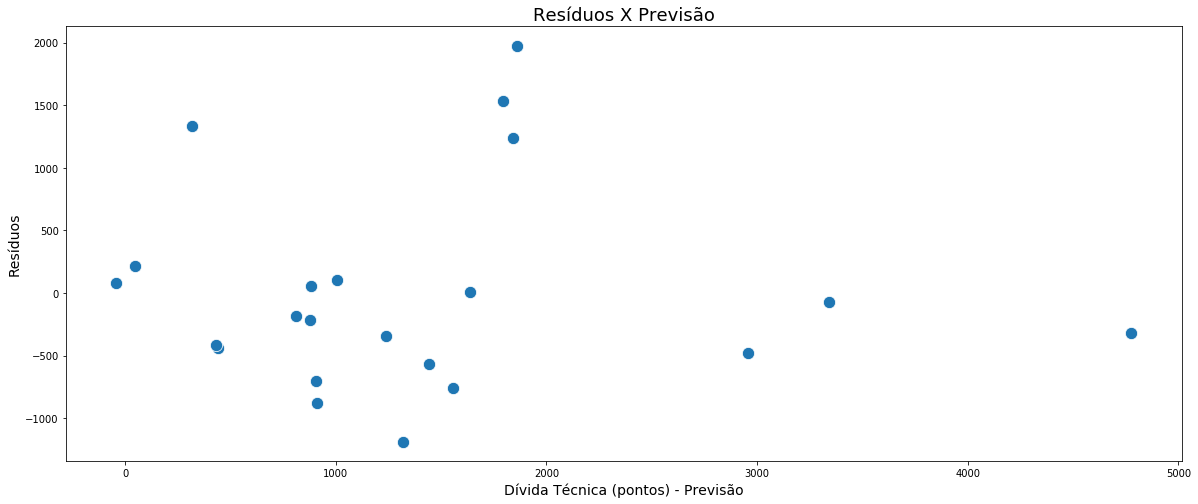

In [342]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Dívida Técnica (pontos) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

In [343]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [344]:
nsample = 100
np.random.seed(7654321)

In [345]:
np.random.seed(7654321)

In [346]:
type(residuo)

pandas.core.series.Series

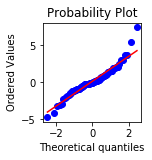

In [347]:
ax1 = plt.subplot(233)
x = stats.t.rvs(3, size=nsample)
res = stats.probplot(x, plot=plt)

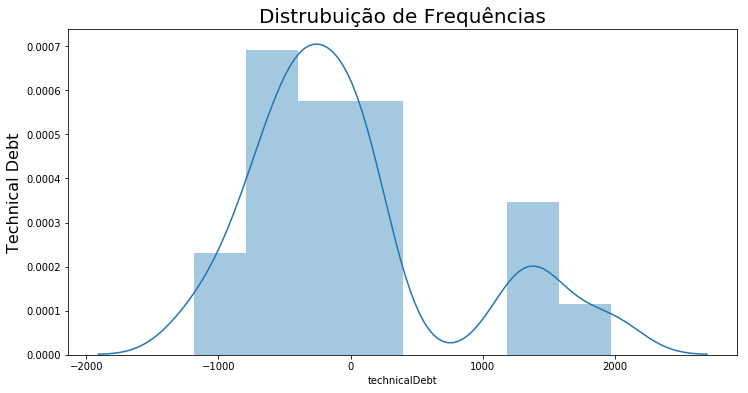

In [348]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel("Technical Debt", fontsize=16)
ax

## Using square waste


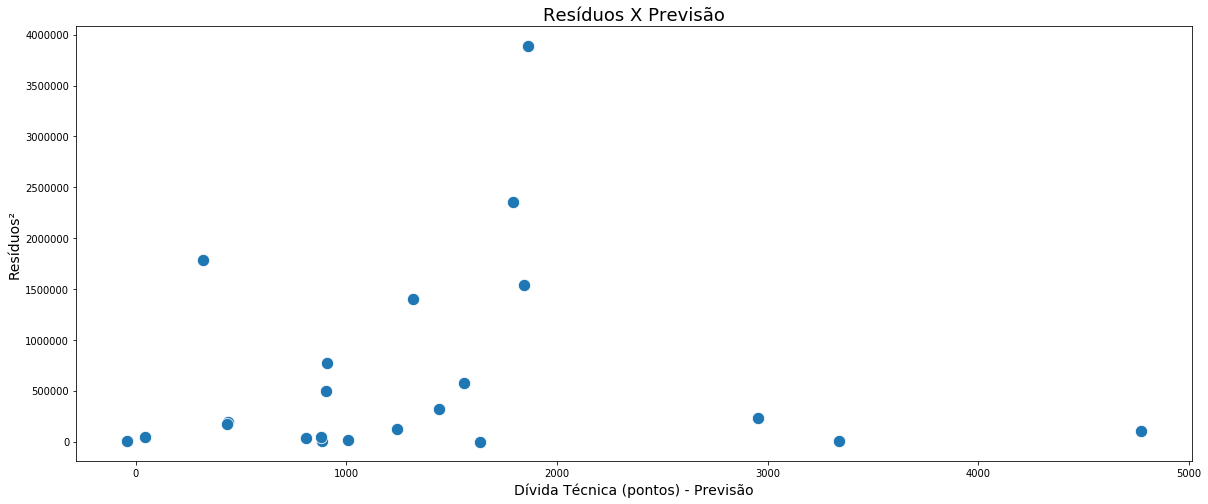

In [349]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Dívida Técnica (pontos) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

## Plotting the frequency distribution of waste

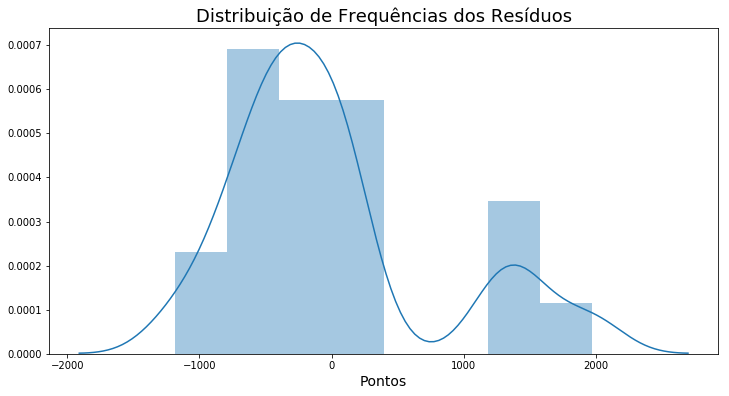

In [350]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Pontos', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Comparing Models</font>
<hr style='border: 2px solid red;'>

## Evaluated Data (TD Metrics)

In [351]:
df_all_metrics.head(3)

,uniqueID,ID,location,maturity,totalDevelopers,complexityPoints,start,end,leadTime,technicalDebt,taskScaling,taskGlobalDistance
0,PC:14187,TURK-372,India,4.0,13.0,60.0,2014-08-11 00:00:00,2015-02-06 00:00:00,179.0,796.0,0.216667,1.250000
1,PC:15448,BHA-328,Virtual,4.0,25.0,170.0,2015-01-19 00:00:00,2015-06-05 00:00:00,137.0,2474.0,0.147059,6.244748
2,PC:13350,TELSTRA-038,India,4.0,7.0,35.0,2015-02-09 00:00:00,2015-04-02 00:00:00,52.0,202.0,0.200000,3.463991


## Dependent Variable y (TD) 

In [352]:
y
y.tolist()[0:3]

[796.0, 2474.0, 202.0]

## Features (X1, X2, X3, X4) that impacts TD (Y)

In [353]:
my_dict

{0: 'technicalDebt',
 1: 'leadTime',
 2: 'complexityPoints',
 3: 'totalDevelopers',
 4: 'taskScaling',
 5: 'maturity',
 6: 'taskGlobalDistance'}

In [354]:
X.head(3)

,leadTime,complexityPoints,totalDevelopers,taskScaling
0,179.0,60.0,13.0,0.216667
1,137.0,170.0,25.0,0.147059
2,52.0,35.0,7.0,0.200000


## Model 1 (LeadTime)

In [355]:
X1 = df_all_metrics[[my_dict[1]]]

### Creating train and test dataset


In [356]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=1000)

### Instance of class *LinearRegression()*


In [357]:
modelo_1 = LinearRegression()

### Using the * fit () * method of the "model_1" object to estimate our linear model using the TRAINING data (y1_train and X1_train)

In [358]:
modelo_1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Getting the determination coefficient (R²) of the new estimated model and comparing it with the result of the previous model

In [359]:
modelo_1_score = modelo_1.score(X1_train, y1_train).round(2)
print('Modelo com LeadTime')
print('R² = {}'.format(modelo_1.score(X1_train, y1_train).round(2)))
print('Modelo com as 4 variáveis')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com LeadTime
R² = 0.16
Modelo com as 4 variáveis
R² = 0.65


### Generating forecasts for TEST data (X_test and X1_test) using the * predict () * method of the "model" and "model_2" objects

In [360]:
y_previsto = modelo.predict(X_test)
y_previsto_1 = modelo_1.predict(X1_test)

### Getting the coefficient of determination (R²) for the predictions of the two models

In [361]:
modelo_1_metrics_r2_score = metrics.r2_score(y1_test, y_previsto_1).round(2)
print('Modelo com LeadTime')
print('R² = {}'.format(modelo_1_metrics_r2_score))
print('Modelo com as quatro variáveis')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com LeadTime
R² = 0.11
Modelo com as quatro variáveis
R² = 0.06


## Model 2 (LeadTime, complexityPoints)

In [362]:
X2 = df_all_metrics[[my_dict[1], my_dict[2]]]
X2.head(3)

,leadTime,complexityPoints
0,179.0,60.0
1,137.0,170.0
2,52.0,35.0


### Criando os datasets de treino e de teste


In [363]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=1000)

### Instanciando a classe *LinearRegression()*


In [364]:
modelo_2 = LinearRegression()

### Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [365]:
modelo_2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [366]:
modelo_2_score = modelo_2.score(X2_train, y2_train).round(2)
print('Modelo com LeadTime, complexityPoints')
print('R² = {}'.format(modelo_2_score))
print('Modelo com as 4 variáveis')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com LeadTime, complexityPoints
R² = 0.6
Modelo com as 4 variáveis
R² = 0.65


### Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [367]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

### Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [368]:
modelo_2_metrics_r2_score = metrics.r2_score(y2_test, y_previsto_2).round(2)
print('Modelo com LeadTime, ComplexityPontis')
print('R² = {}'.format(modelo_2_metrics_r2_score))
print('Modelo com as quatro variáveis')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com LeadTime, ComplexityPontis
R² = 0.09
Modelo com as quatro variáveis
R² = 0.06


## Model 3 (LeadTime, ComplexityPoints, totalDevelopers)

In [369]:
X3 = df_all_metrics[[my_dict[1], my_dict[2], my_dict[3]]]
X3.head(3)

,leadTime,complexityPoints,totalDevelopers
0,179.0,60.0,13.0
1,137.0,170.0,25.0
2,52.0,35.0,7.0


### Criando os datasets de treino e de teste


In [370]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3, random_state=1000)

### Instanciando a classe *LinearRegression()*


In [371]:
modelo_3 = LinearRegression()

### Utilizando o método *fit()* do objeto "modelo_3" para estimar nosso modelo linear utilizando os dados de TREINO (y3_train e X3_train)

In [372]:
modelo_3.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [373]:
modelo_3_score = modelo_3.score(X3_train, y3_train).round(2)
print('Modelo com LeadTime, ComplexityPoints, totalDevelopers')
print('R² = {}'.format(modelo_3_score))
print('Modelo com as 4 variáveis')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com LeadTime, ComplexityPoints, totalDevelopers
R² = 0.6
Modelo com as 4 variáveis
R² = 0.65


### Gerando previsões para os dados de TESTE (X_test e X3_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_3"

In [374]:
y_previsto = modelo.predict(X_test)
y_previsto_3 = modelo_3.predict(X3_test)

### Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [375]:
modelo_3_metrics_r2_score = metrics.r2_score(y3_test, y_previsto_3).round(2)
print('Modelo com LeadTime')
print('R² = {}'.format(modelo_3_metrics_r2_score))
print('Modelo com as quatro variáveis')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com LeadTime
R² = 0.09
Modelo com as quatro variáveis
R² = 0.06


## Model 4 (LeadTime, ComplexityPoints, totalDevelopers, taskScaling)

In [376]:
X4 = df_all_metrics[[my_dict[1], my_dict[2], my_dict[3], my_dict[4]]]
X4.head(3)

,leadTime,complexityPoints,totalDevelopers,taskScaling
0,179.0,60.0,13.0,0.216667
1,137.0,170.0,25.0,0.147059
2,52.0,35.0,7.0,0.200000


### Criando os datasets de treino e de teste


In [377]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.3, random_state=1000)

### Instanciando a classe *LinearRegression()*


In [378]:
modelo_4 = LinearRegression()

### Utilizando o método *fit()* do objeto "modelo_4" para estimar nosso modelo linear utilizando os dados de TREINO (y4_train e X4_train)

In [379]:
modelo_4.fit(X4_train, y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [380]:
modelo_4_score = modelo_4.score(X4_train, y4_train).round(2)
print('Modelo com LeadTime, ComplexityPoints, totalDevelopers, taskScaling')
print('R² = {}'.format(modelo_4_score))

Modelo com LeadTime, ComplexityPoints, totalDevelopers, taskScaling
R² = 0.65


### Gerando previsões para os dados de TESTE (X_test e X4_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_4"

In [381]:
y_previsto = modelo.predict(X_test)
y_previsto_4 = modelo_4.predict(X4_test)

### Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [382]:
modelo_4_metrics_r2_score = metrics.r2_score(y4_test, y_previsto_4).round(2)
print('Modelo com LeadTime, ComplexityPoints, totalDevelopers, taskScaling')
print('R² = {}'.format(modelo_4_metrics_r2_score))
print('Modelo com as quatro variáveis')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com LeadTime, ComplexityPoints, totalDevelopers, taskScaling
R² = 0.06
Modelo com as quatro variáveis
R² = 0.06


## Comparing the models

In [383]:
my_data_modelo = np.array([
    [modelo_1_score, modelo_1_metrics_r2_score],
    [modelo_2_score, modelo_2_metrics_r2_score],
    [modelo_3_score, modelo_3_metrics_r2_score],
    [modelo_4_score, modelo_4_metrics_r2_score],
                   ])
my_index_modelo = ['modelo_1', 'modelo_2', 'modelo_3', 'modelo_4']
my_columns_modelo = ['score', 'r2_score']
pd.DataFrame(data=my_data_modelo, index=my_index_modelo, columns=my_columns_modelo)

,score,r2_score
modelo_1,0.16,0.11
modelo_2,0.60,0.09
modelo_3,0.60,0.09
modelo_4,0.65,0.06


# <font color='red' style='font-size: 30px;'>Other Regression Metrics </font>
<hr style='border: 2px solid red;'>

## Regression metrics
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Some statistics getting from the regression model are very useful as a criteria for comparing estimated models and selecting the best model. The main regression metrics that scikit-learn makes available for linear models are as follows:

### Mean Square Error

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Root-mean-square deviation

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$


## Getting metrics for model with LeadTime

In [384]:
EQM_1 = metrics.mean_squared_error(y1_test, y_previsto_1).round(2)
REQM_1 = np.sqrt(metrics.mean_squared_error(y1_test, y_previsto_1)).round(2)
R2_1 = metrics.r2_score(y1_test, y_previsto_1).round(2)

pd.DataFrame([EQM_1, REQM_1, R2_1], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,2208725.26
REQM,1486.18
R²,0.11


## Getting metrics for model with LeadTime, ComplexityPoints

In [385]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,2261796.57
REQM,1503.93
R²,0.09


## Getting metrics for model with LeadTime, ComplexityPoints, TotalDevelopers

In [386]:
EQM_3 = metrics.mean_squared_error(y3_test, y_previsto_3).round(2)
REQM_3 = np.sqrt(metrics.mean_squared_error(y3_test, y_previsto_3)).round(2)
R2_3 = metrics.r2_score(y3_test, y_previsto_3).round(2)

pd.DataFrame([EQM_3, REQM_3, R2_3], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,2253371.63
REQM,1501.12
R²,0.09


## Getting metrics for model with LeadTime, ComplexityPoints, TotalDevelopers e TaskScaling

In [387]:
EQM_4 = metrics.mean_squared_error(y4_test, y_previsto_4).round(2)
REQM_4 = np.sqrt(metrics.mean_squared_error(y4_test, y_previsto_4)).round(2)
R2_4 = metrics.r2_score(y4_test, y_previsto_4).round(2)

pd.DataFrame([EQM_4, REQM_4, R2_4], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,2324809.84
REQM,1524.73
R²,0.06


## Comparing Metrics

In [388]:
my_data_metricas = np.array([
    [EQM_1, REQM_1, R2_1], 
    [EQM_2, REQM_2, R2_2], 
    [EQM_3, REQM_3, R2_3], 
    [EQM_4, REQM_4, R2_4], 
    ])
my_index_metricas = ['modelo1', 'modelo2', 'modelo3', 'modelo4']
my_columns_metricas = ['EQM', 'REQM', 'R²']

df_my_metricas = pd.DataFrame(data=my_data_metricas, index=my_index_metricas, columns=my_columns_metricas)
df_my_metricas

,EQM,REQM,R²
modelo1,2208725.26,1486.18,0.11
modelo2,2261796.57,1503.93,0.09
modelo3,2253371.63,1501.12,0.09
modelo4,2324809.84,1524.73,0.06


## Wilcoxon

In [417]:
# Wilcoxon signed-rank test
# The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. 
# In particular, it tests whether the distribution of the differences x - y is symmetric about zero. 
# It is a non-parametric version of the paired T-test.

from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

In [418]:
def checkWilcoxonSingedRank(data1, data2, alpha=0.05):
  stat, p = wilcoxon(data1, data2)
  print('Statistics=%.3f, p=%.3f' % (stat, p))

  # interpret
  if p > alpha:
    print('Same distribution (fail to reject H0)')
  else:
    print('Different distribution (reject H0)')
  return stat.round(3), p.round(3)

In [391]:
for i in range(1,5):
  print(my_dict[i])
  print(checkWilcoxonSingedRank(df_all_metrics[my_dict[i]].values, df_all_metrics.technicalDebt.values))
  print("---")

leadTime
Statistics=39.000, p=0.000
Different distribution (reject H0)
(39.0, 0.0)
---
complexityPoints
Statistics=17.000, p=0.000
Different distribution (reject H0)
(17.0, 0.0)
---
totalDevelopers
Statistics=3.000, p=0.000
Different distribution (reject H0)
(3.0, 0.0)
---
taskScaling
Statistics=1.000, p=0.000
Different distribution (reject H0)
(1.0, 0.0)
---


## Durbin_Watson

In [392]:
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.stattools import durbin_watson

In [393]:
def dw(data):
    ols_res = OLS(data, np.ones(len(data))).fit()
    return durbin_watson(ols_res.resid)

In [394]:
print("dw of range=%f technicalDebt" % dw(df_all_metrics.technicalDebt.values))

dw of range=2.041158 technicalDebt


In [395]:
for each in range(1,5):
    print("dw of " + my_dict[each] + " is", dw(df_all_metrics[my_dict[each]].values).round(3))

dw of leadTime is 1.614
dw of complexityPoints is 2.155
dw of totalDevelopers is 1.23
dw of taskScaling is 1.727


In [396]:
my_array_dw = np.array([
	[1.614], 
	[2.155], 
	[1.23], 
	[1.727]
	])
my_index_dw = ['leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling']
my_columns_dw = ['value']

df_my_dw = pd.DataFrame(data=my_array_dw , index=my_index_dw , columns=my_columns_dw)
df_my_dw

,value
leadTime,1.614
complexityPoints,2.155
totalDevelopers,1.230
taskScaling,1.727


In [397]:
with open('latex/mytable2.tex','w') as tf:
    tf.write(df_my_dw.to_latex())
hide_toggle()

## Testing Multicollinearity

In [398]:
import statsmodels.formula.api as smf

### Use formula in statasmodels:

In [399]:
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

## Testing multicollinearity - Modelo 2

In [400]:
my_df_tm_modelo2 = df_all_metrics[[my_dict[0], my_dict[1], my_dict[2]]]
exogs_modelo2 = ['leadTime', 'complexityPoints']

In [401]:
df_vif_modelo2 = sklearn_vif(exogs=exogs_modelo2, data=my_df_tm_modelo2)
df_vif_modelo2

,VIF,Tolerance
complexityPoints,1.122237,0.891078
leadTime,1.122237,0.891078


## Testing multicollinearity - Modelo 3

In [402]:
my_df_tm_modelo3 = df_all_metrics[[my_dict[0], my_dict[1], my_dict[2], my_dict[3]]]
exogs_modelo3 = ['leadTime', 'complexityPoints', 'totalDevelopers']

In [403]:
df_vif_modelo3 = sklearn_vif(exogs=exogs_modelo3, data=my_df_tm_modelo3)
df_vif_modelo3

,VIF,Tolerance
complexityPoints,1.142512,0.875264
leadTime,1.602167,0.624155
totalDevelopers,1.565316,0.638849


## Testing multicollinearity - Modelo 4

In [404]:
my_df_tm_modelo4 = df_all_metrics[[my_dict[0], my_dict[1], my_dict[2], my_dict[3], my_dict[4]]]
exogs_modelo4 = ['leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling']

In [405]:
df_vif_modelo4 = sklearn_vif(exogs=exogs_modelo4, data=my_df_tm_modelo4)
df_vif_modelo4

,VIF,Tolerance
complexityPoints,1.496794,0.668094
leadTime,1.764050,0.566877
taskScaling,1.511341,0.661664
totalDevelopers,1.823810,0.548303


In [406]:
vl1_modelo1 = [1, '', '', '']			

vl2_modelo2 = [df_vif_modelo2.VIF["leadTime"].round(3), df_vif_modelo2.VIF["complexityPoints"].round(3), '','']

vl3_modelo3 = [df_vif_modelo3.VIF["leadTime"].round(3), df_vif_modelo3.VIF["complexityPoints"].round(3), df_vif_modelo3.VIF["totalDevelopers"].round(3), '']

vl4_modelo4 = [df_vif_modelo4.VIF["leadTime"].round(3), df_vif_modelo4.VIF["complexityPoints"].round(3), 
df_vif_modelo4.VIF["totalDevelopers"].round(3), df_vif_modelo4.VIF["taskScaling"].round(3)]

tl1_modelo1	= [1, '', '', '']

tl2_modelo2	= [df_vif_modelo2.Tolerance["leadTime"].round(3),df_vif_modelo2.Tolerance["complexityPoints"].round(3), '','']

tl3_modelo3	= [df_vif_modelo3.Tolerance["leadTime"].round(3), 	df_vif_modelo3.Tolerance["complexityPoints"].round(3), 								df_vif_modelo3.Tolerance["totalDevelopers"].round(3), '']

tl4_modelo4	= [df_vif_modelo4.Tolerance["leadTime"].round(3), df_vif_modelo4.Tolerance["complexityPoints"].round(3), 
						df_vif_modelo4.Tolerance["totalDevelopers"].round(3), df_vif_modelo4.Tolerance["taskScaling"].round(3)]

hide_toggle()

In [407]:
my_array_dw_vif = np.array([
	vl1_modelo1, 
	vl2_modelo2, 
	vl3_modelo3, 
	vl4_modelo4
	])

my_index_dw_vif = ['modelo1', 'modelo2', 'modelo3', 'modelo4']

my_columns_dw_vif = ['leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling']

df_my_dw_vif = pd.DataFrame(data=my_array_dw_vif, index=my_index_dw_vif, columns=my_columns_dw_vif)
print("VIF")
df_my_dw_vif
hide_toggle()

VIF


In [408]:
with open('latex/mytable3.tex','w') as tf:
    tf.write(df_my_dw_vif.to_latex())
hide_toggle()

In [409]:
my_array_dw_t = np.array([
	tl1_modelo1, 
	tl2_modelo2, 
	tl3_modelo3, 
	tl4_modelo4
	])
my_index_dw_t = ['modelo1', 'modelo2', 'modelo3', 'modelo4']
my_columns_dw_t = ['leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling']
df_my_dw_t = pd.DataFrame(data=my_array_dw_t , index=my_index_dw_t , columns=my_columns_dw_t)
print("Tolerance")
df_my_dw_t
hide_toggle()

Tolerance


In [410]:
with open('latex/mytable4.tex','w') as tf:
    tf.write(df_my_dw_t.to_latex())
hide_toggle()

## Testing homoscedasticity

In [411]:
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats.distributions import chi2

In [412]:
def breusch_pagan_test(x, y):
    '''
    Breusch-Pagan test for heteroskedasticity in a linear regression model:
    H_0 = No heteroskedasticity.
    H_1 = Heteroskedasticity is present.

    Inputs:
    x = a numpy.ndarray containing the predictor variables. Shape = (nSamples, nPredictors).
    y = a 1D numpy.ndarray containing the response variable. Shape = (nSamples, ).

    Outputs a list containing three elements:
    1. the Breusch-Pagan test statistic.
    2. the p-value for the test.
    3. the test result.
    '''

    if y.ndim != 1:
        raise SystemExit('Error: y has more than 1 dimension.')
    if x.shape[0] != y.shape[0]:
        raise SystemExit('Error: the number of samples differs between x and y.')
    else:
        n_samples = y.shape[0]

    # fit an OLS linear model to y using x:
    lm = LinearRegression()
    lm.fit(x, y)

    # calculate the squared errors:
    err = (y - lm.predict(x))**2

    # fit an auxiliary regression to the squared errors:
    # why?: to estimate the variance in err explained by x
    lm.fit(x, err)
    pred_err = lm.predict(x)
    del lm

    # calculate the coefficient of determination:
    ss_tot = sum((err - np.mean(err))**2)
    ss_res = sum((err - pred_err)**2)
    r2 = 1 - (ss_res / ss_tot)
    del err, pred_err, ss_res, ss_tot

    # calculate the Lagrange multiplier:
    LM = n_samples * r2
    del r2

    # calculate p-value. degrees of freedom = number of predictors.
    # this is equivalent to (p - 1) parameter restrictions in Wikipedia entry.
    pval = chi2(LM, x.shape[1])

    #if pval <= 0.01:
     #   test_result = 'Heteroskedasticity present at 99% CI.'
    #elif pval <= 0.05:
        #test_result = 'Heteroskedasticity present at 95% CI.'
    #else:
        #test_result = 'No significant heteroskedasticity.'
    test_result = '?'
    return [LM, pval, test_result]


In [413]:
my_y = my_df_tm_modelo4[[my_dict[0]]]

In [414]:
my_y_series = my_y.technicalDebt

In [415]:
my_X = my_df_tm_modelo4[['leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling']]

In [416]:
breusch_pagan_test(my_X.values, my_y_series.values)

[2.3261542987377553,
 '?']

## Testing normality

<p>
The normal distribution of residuals is tested by visually checking the normal P-P plot. The points on the plot remain close to the diagonal line, which means residuals are normally distributed. So, we do not violate the assumption of normality.
</p>

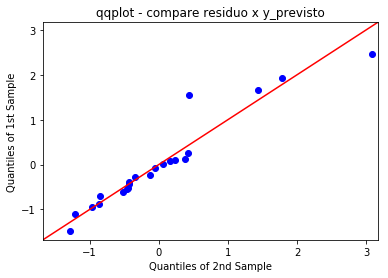

In [473]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import scipy.stats as stats

# example 5
import numpy as np
x = residuo.values 
y = y_previsto_train
pp_x = sm.ProbPlot(x, fit=True)
pp_y = sm.ProbPlot(y, fit=True)
fig = pp_x.qqplot(line='45', other=pp_y)
h = plt.title('qqplot - compare residuo x y_previsto')
plt.show()

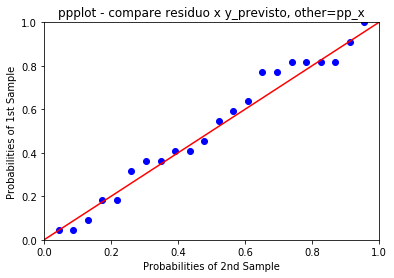

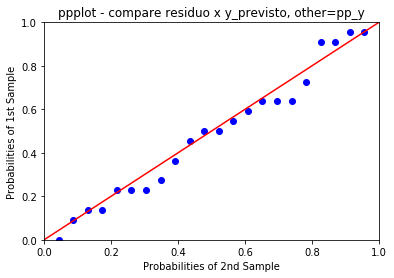

In [465]:
# example 7
x = residuo.values 
y = y_previsto_train
pp_x = sm.ProbPlot(x, fit=True)
pp_y = sm.ProbPlot(y, fit=True)
fig = pp_y.ppplot(line='45', other=pp_x)
h = plt.title('ppplot - compare residuo x y_previsto, other=pp_x')

fig = pp_x.ppplot(line='45', other=pp_y)
h = plt.title('ppplot - compare residuo x y_previsto, other=pp_y')
plt.show()

In [450]:
residuo.values

array([   59.37066873,  1535.63901796,  -320.34685819,    78.40796687,
        -703.32010189,  -876.0674148 ,  -565.10949271,   214.8100728 ,
        1971.56011564,  -435.03193745,   107.67603779,  -182.88429535,
        -412.55660813,   -70.35340307,  -213.90663823,  -345.8684254 ,
        -482.2615027 ,     7.43437083,  -761.0328069 ,  1241.64679812,
       -1185.19903164,  1337.39346773])

In [452]:
y_previsto_train

array([ 883.62933127, 1793.36098204, 4775.34685819,  -41.40796687,
        905.32010189,  910.0674148 , 1441.10949271,   45.1899272 ,
       1862.43988436,  439.23193745, 1007.32396221,  808.88429535,
        432.55660813, 3340.35340307,  879.90663823, 1238.8684254 ,
       2956.2615027 , 1635.56562917, 1557.0328069 , 1843.35320188,
       1318.19903164,  318.60653227])

In [472]:
y_train.values

array([9.430e+02, 3.329e+03, 4.455e+03, 3.700e+01, 2.020e+02, 3.400e+01,
       8.760e+02, 2.600e+02, 3.834e+03, 4.200e+00, 1.115e+03, 6.260e+02,
       2.000e+01, 3.270e+03, 6.660e+02, 8.930e+02, 2.474e+03, 1.643e+03,
       7.960e+02, 3.085e+03, 1.330e+02, 1.656e+03])